In [1]:
import os
import sys
from os.path import join as osj
from bisect import bisect
from collections import defaultdict
import pickle
import json
#!pip install wfdb
import wfdb

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from scipy.special import binom

import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as tt
from torch.utils.data import random_split
from torchvision.utils import make_grid
from torchvision import transforms
from torch.autograd import Variable
import torch.utils.data as data_utils
import torch.nn.init as init

from collections import Counter
import operator
import copy
from itertools import product,combinations
from time import time
#from IPython.core.display import display

%matplotlib inline

## code extracted from https://www.kaggle.com/code/graymant/breast-cancer-diagnosis-with-pytorch
## SV code extracted from https://

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [4]:
import os
print('2/4')
experiments = ['MNIST_PRTFL_1','MNIST_PRTFL_2','MNIST_PRTFL_3','MNIST_PRTFL_4','MNIST_PRTFL_5']
print('local 25')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))

2/4
local 25
mean:  98.8088845496705
std:  0.08650253915874684


In [25]:
import os
print('2/4')
experiments = ['MIT_PRTFL_010_1','MIT_PRTFL_010_2','MIT_PRTFL_010_3','MIT_PRTFL_010_4','MIT_PRTFL_010_5']
print('local 10')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))

experiments = ['MIT_PRTFL_025_1','MIT_PRTFL_025_2','MIT_PRTFL_025_3','MIT_PRTFL_025_4','MIT_PRTFL_025_5']
print('local 25')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))

experiments = ['MIT_PRTFL_050_1','MIT_PRTFL_050_2','MIT_PRTFL_050_3','MIT_PRTFL_050_4','MIT_PRTFL_050_5']
print('local 25')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))

experiments = ['MIT_PRTFL_1','MIT_PRTFL_2','MIT_PRTFL_3','MIT_PRTFL_4','MIT_PRTFL_5']
print('local 100')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))

2/4
local 10
mean:  0.37913764645010983
std:  0.011972140525672706
local 25
mean:  0.4111953569029286
std:  0.03609604254985723
local 25
mean:  0.5306014367466483
std:  0.05403436226461047
local 100
mean:  0.7230225301768556
std:  0.0432305128397805


In [18]:
import os
print('2/4')
experiments = ['CHB_PRTFL_010_1','CHB_PRTFL_010_2','CHB_PRTFL_010_3','CHB_PRTFL_010_4','CHB_PRTFL_010_5']
print('local 10')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))

experiments = ['CHB_PRTFL_025_1','CHB_PRTFL_025_2','CHB_PRTFL_025_3','CHB_PRTFL_025_4','CHB_PRTFL_025_5']
print('local 25')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))

experiments = ['CHB_PRTFL_050_1','CHB_PRTFL_050_2','CHB_PRTFL_050_3','CHB_PRTFL_050_4','CHB_PRTFL_050_5']
print('local 25')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))

experiments = ['CHB_PRTFL_1','CHB_PRTFL_2','CHB_PRTFL_3','CHB_PRTFL_4','CHB_PRTFL_5']
print('local 100')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))

2/4
local 10
mean:  66.91391629806057
std:  4.3647076882872184
local 25
mean:  76.13473970738346
std:  3.2253715779104137
local 25
mean:  80.76216400136101
std:  1.039545774967175
local 100
mean:  83.91289554270159
std:  0.843495089886147


In [74]:
import os
print('2/4')
experiments = ['MNIST_federated_24_025_1','MNIST_federated_24_025_2','MNIST_federated_24_025_3','MNIST_federated_24_025_4','MNIST_federated_24_025_5']
print('local 25')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))

experiments = ['MNIST_federated_24_050_1','MNIST_federated_24_050_2','MNIST_federated_24_050_3','MNIST_federated_24_050_4','MNIST_federated_24_050_5']
print('local 50')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))

print('3/4')
experiments = ['MNIST_federated_34_025_1','MNIST_federated_34_025_2','MNIST_federated_34_025_3','MNIST_federated_34_025_4','MNIST_federated_34_025_5']
print('local 25')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))

experiments = ['MNIST_federated_34_050_1','MNIST_federated_34_050_2','MNIST_federated_34_050_3','MNIST_federated_34_050_4','MNIST_federated_34_050_5']
print('local 50')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))

2/4
local 25
mean:  89.65584574078594
std:  3.5661366866037185
local 50


FileNotFoundError: checkpoints_bandits/MNIST_federated_24_050_1/test_accuracy.txt not found.

In [22]:
import os
print('2/4')
experiments = ['MNIST_optimal_24_025_1','MNIST_optimal_24_025_2','MNIST_optimal_24_025_3','MNIST_optimal_24_025_4','MNIST_optimal_24_025_5']
print('local 25')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))

experiments = ['MNIST_optimal_24_050_1','MNIST_optimal_24_050_2','MNIST_optimal_24_050_3','MNIST_optimal_24_050_4','MNIST_optimal_24_050_5']
print('local 50')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))

print('3/4')
experiments = ['MNIST_optimal_34_025_1','MNIST_optimal_34_025_2','MNIST_optimal_34_025_3','MNIST_optimal_34_025_4','MNIST_optimal_34_025_5']
print('local 25')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))

experiments = ['MNIST_optimal_34_050_1','MNIST_optimal_34_050_2','MNIST_optimal_34_050_3','MNIST_optimal_34_050_4','MNIST_optimal_34_050_5']
print('local 50')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))

2/4
local 25
mean:  84.26165486941666
std:  3.6025037795040347
local 50
mean:  91.90627288259702
std:  0.5027358353113183
3/4
local 25
mean:  85.9249937075258
std:  1.2245510479402606
local 50
mean:  92.36345330984142
std:  0.5912729669278042


In [75]:
print('2 percent')
experiments = ['MNIST_local_24_002_1','MNIST_local_24_002_2','MNIST_local_24_002_3','MNIST_local_24_002_4','MNIST_local_24_002_5']
print('local')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))

print('2 percent')
print('bandits')
experiments = ['MNIST_bandits_10_24_002_1','MNIST_bandits_10_24_002_2','MNIST_bandits_10_24_002_3','MNIST_bandits_10_24_002_4','MNIST_bandits_10_24_002_5']
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))

2 percent
local
mean:  45.92628752745912
std:  11.678797764800718
2 percent
bandits
mean:  56.24603368318283
std:  3.1221237054039115


In [124]:
print('centralized')
print('2/4')
experiments = ['MNIST_centralized_24_010_1','MNIST_centralized_24_010_2','MNIST_centralized_24_010_3','MNIST_centralized_24_010_4','MNIST_centralized_24_010_5']
print('local 10')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))
print('2/4')
experiments = ['MNIST_centralized_24_025_1','MNIST_centralized_24_025_2','MNIST_centralized_24_025_3','MNIST_centralized_24_025_4','MNIST_centralized_24_025_5']
print('local 25')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))
experiments = ['MNIST_centralized_24_1','MNIST_centralized_24_2','MNIST_centralized_24_3','MNIST_centralized_24_4','MNIST_centralized_24_5']
print('local 100')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))

print('/n')
print('centralized')
print('3/4')
experiments = ['MNIST_centralized_34_010_1','MNIST_centralized_34_010_2','MNIST_centralized_34_010_3','MNIST_centralized_34_010_4','MNIST_centralized_34_010_5']
print('local 10')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))
print('3/4')
experiments = ['MNIST_centralized_34_025_1','MNIST_centralized_34_025_2','MNIST_centralized_34_025_3','MNIST_centralized_34_025_4','MNIST_centralized_34_025_5']
print('local 25')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))
experiments = ['MNIST_centralized_34_1','MNIST_centralized_34_2','MNIST_centralized_34_3','MNIST_centralized_34_4','MNIST_centralized_34_5']
print('local 100')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))

print('4/4')
experiments = ['MNIST_centralized_44_1','MNIST_centralized_44_2','MNIST_centralized_44_3','MNIST_centralized_44_4','MNIST_centralized_44_5']
print('local 100')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))

centralized
2/4
local 10
mean:  98.7698315840859
std:  0.27855196715035085
2/4
local 25
mean:  99.16524286062972
std:  0.028464495459337467
local 100
mean:  99.48742982670247
std:  0.1205671372734042
/n
centralized
3/4
local 10
mean:  98.79687893279637
std:  0.11412820587721847
3/4
local 25
mean:  99.25497105461868
std:  0.10631116074474106
local 100
mean:  99.6073496098666
std:  0.0851323157578008
4/4
local 100
mean:  99.63
std:  0.09669539802906706


In [109]:
print('AFPL 0.25')
print('2/4')
experiments = ['MNIST_APFL1_24_010_1','MNIST_APFL1_24_010_2','MNIST_APFL1_24_010_3','MNIST_APFL1_24_010_4','MNIST_APFL1_24_010_5']
print('local 10')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))
print('2/4')
experiments = ['MNIST_APFL1_24_025_1','MNIST_APFL1_24_025_2','MNIST_APFL1_24_025_3','MNIST_APFL1_24_025_4','MNIST_APFL1_24_025_5']
print('local 25')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))
print('3/4')
experiments = ['MNIST_APFL1_34_010_1','MNIST_APFL1_34_010_2','MNIST_APFL1_34_010_3','MNIST_APFL1_34_010_4','MNIST_APFL1_34_010_5']
print('local 10')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))
print('2/4')
experiments = ['MNIST_APFL1_34_025_1','MNIST_APFL1_34_025_2','MNIST_APFL1_34_025_3','MNIST_APFL1_34_025_4','MNIST_APFL1_34_025_5']
print('local 25')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))

print('\n')
print('AFPL 0.5')
print('2/4')
experiments = ['MNIST_APFL2_24_010_1','MNIST_APFL2_24_010_2','MNIST_APFL2_24_010_3','MNIST_APFL2_24_010_4','MNIST_APFL2_24_010_5']
print('local 10')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))
print('2/4')
experiments = ['MNIST_APFL2_24_025_1','MNIST_APFL2_24_025_2','MNIST_APFL2_24_025_3','MNIST_APFL2_24_025_4','MNIST_APFL2_24_025_5']
print('local 25')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))
print('3/4')
experiments = ['MNIST_APFL2_34_010_1','MNIST_APFL2_34_010_2','MNIST_APFL2_34_010_3','MNIST_APFL2_34_010_4','MNIST_APFL2_34_010_5']
print('local 10')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))
print('2/4')
experiments = ['MNIST_APFL2_34_025_1','MNIST_APFL2_34_025_2','MNIST_APFL2_34_025_3','MNIST_APFL2_34_025_4','MNIST_APFL2_34_025_5']
print('local 25')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))

print('\n')
print('AFPL 0.75')
print('2/4')
experiments = ['MNIST_APFL3_24_010_1','MNIST_APFL3_24_010_2','MNIST_APFL3_24_010_3','MNIST_APFL3_24_010_4','MNIST_APFL3_24_010_5']
print('local 10')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))
print('2/4')
experiments = ['MNIST_APFL3_24_025_1','MNIST_APFL3_24_025_2','MNIST_APFL3_24_025_3','MNIST_APFL3_24_025_4','MNIST_APFL3_24_025_5']
print('local 25')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))
print('3/4')
experiments = ['MNIST_APFL3_34_010_1','MNIST_APFL3_34_010_2','MNIST_APFL3_34_010_3','MNIST_APFL3_34_010_4','MNIST_APFL3_34_010_5']
print('local 10')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))
print('2/4')
experiments = ['MNIST_APFL3_34_025_1','MNIST_APFL3_34_025_2','MNIST_APFL3_34_025_3','MNIST_APFL3_34_025_4','MNIST_APFL3_34_025_5']
print('local 25')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))

AFPL 0.25
2/4
local 10
mean:  81.62557969245789
std:  8.670992420422865
2/4
local 25
mean:  93.07298022943617
std:  3.4066368268835916
3/4
local 10
mean:  88.93531336521521
std:  1.9199599921388448
2/4
local 25
mean:  94.83010319657687
std:  0.4439045091376516


AFPL 0.5
2/4
local 10
mean:  83.84183548938248
std:  8.606049468044235
2/4
local 25
mean:  96.01171588967536
std:  0.46685243704194046
3/4
local 10
mean:  89.0964007047571
std:  3.0996561850923174
2/4
local 25
mean:  95.09187012333248
std:  0.4114335110335308


AFPL 0.75
2/4
local 10
mean:  90.32462777642178
std:  2.675137050595459
2/4
local 25
mean:  96.69026116670736
std:  0.6513991930552528
3/4
local 10
mean:  89.92700729927007
std:  2.3341276353549123
2/4
local 25
mean:  95.60030203876163
std:  0.3980983422052429


In [107]:
print('bandits 5')
print('2/4')
experiments = ['MNIST_bandits_5_24_010_1','MNIST_bandits_5_24_010_2','MNIST_bandits_5_24_010_3','MNIST_bandits_5_24_010_4','MNIST_bandits_5_24_010_5']
print('local 10')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))
print('2/4')
experiments = ['MNIST_bandits_5_24_025_1','MNIST_bandits_5_24_025_2','MNIST_bandits_5_24_025_3','MNIST_bandits_5_24_025_4','MNIST_bandits_5_24_025_5']
print('local 25')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))
print('3/4')
experiments = ['MNIST_bandits_5_34_010_1','MNIST_bandits_5_34_010_2','MNIST_bandits_5_34_010_3','MNIST_bandits_5_34_010_4','MNIST_bandits_5_34_010_5']
print('local 10')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))
print('2/4')
experiments = ['MNIST_bandits_5_34_025_1','MNIST_bandits_5_34_025_2','MNIST_bandits_5_34_025_3','MNIST_bandits_5_34_025_4','MNIST_bandits_5_34_025_5']
print('local 25')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))

print('bandits 25')
print('2/4')
experiments = ['MNIST_bandits_25_24_010_1','MNIST_bandits_25_24_010_2','MNIST_bandits_25_24_010_3','MNIST_bandits_25_24_010_4','MNIST_bandits_25_24_010_5']
print('local 10')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))
print('2/4')
experiments = ['MNIST_bandits_25_24_025_1','MNIST_bandits_25_24_025_2','MNIST_bandits_25_24_025_3','MNIST_bandits_25_24_025_4','MNIST_bandits_25_24_025_5']
print('local 25')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))

print('3/4')
experiments = ['MNIST_bandits_25_34_010_1','MNIST_bandits_25_34_010_2','MNIST_bandits_25_34_010_3','MNIST_bandits_25_34_010_4','MNIST_bandits_25_34_010_5']
print('local 10')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))
print('2/4')
experiments = ['MNIST_bandits_25_34_025_1','MNIST_bandits_25_34_025_2','MNIST_bandits_25_34_025_3','MNIST_bandits_25_34_025_4','MNIST_bandits_25_34_025_5']
print('local 25')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))

print('bandits 100')
print('3/4')
experiments = ['MNIST_bandits_100_24_010_1','MNIST_bandits_100_24_010_2','MNIST_bandits_100_24_010_3','MNIST_bandits_100_24_010_4','MNIST_bandits_100_24_010_5']
print('local 10')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))
print('3/4')
experiments = ['MNIST_bandits_100_24_025_1','MNIST_bandits_100_24_025_2','MNIST_bandits_100_24_025_3','MNIST_bandits_100_24_025_4','MNIST_bandits_100_24_025_5']
print('local 25')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))

print('2/4')
experiments = ['MNIST_bandits_100_34_010_1','MNIST_bandits_100_34_010_2','MNIST_bandits_100_34_010_3','MNIST_bandits_100_34_010_4','MNIST_bandits_100_34_010_5']
print('local 10')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))
print('2/4')
experiments = ['MNIST_bandits_100_34_025_1','MNIST_bandits_100_34_025_2','MNIST_bandits_100_34_025_3','MNIST_bandits_100_34_025_4','MNIST_bandits_100_34_025_5']
print('local 25')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))

bandits 5
2/4
local 10
mean:  95.20624847449353
std:  1.2850443453276388
2/4
local 25
mean:  98.05223334146936
std:  0.11067399608254423
3/4
local 10
mean:  87.37477976340298
std:  0.9364554733358477
2/4
local 25
mean:  96.39567077774981
std:  0.48163371960191237
bandits 25
2/4
local 10
mean:  96.17769099340981
std:  0.5601327386826855
2/4
local 25
mean:  98.24749816939223
std:  0.14348975793702126
3/4
local 10
mean:  87.91844953435692
std:  0.9634515725791025
2/4
local 25
mean:  96.68260760130883
std:  0.30966134405698215
bandits 100
3/4
local 10
mean:  88.71885225270577
std:  0.9613978077702017
3/4
local 25
mean:  96.67253964258747
std:  0.28935530557664124
2/4
local 10
mean:  96.18257261410788
std:  0.9827225049067857
2/4
local 25
mean:  98.0619965828655
std:  0.1688222256850429


In [89]:
import os
print('local')
experiments = ['MNIST_local_34_010_1','MNIST_local_34_010_2','MNIST_local_34_010_3','MNIST_local_34_010_4','MNIST_local_34_010_5']
print('local 10')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))
print('2/4')
experiments = ['MNIST_local_34_025_1','MNIST_local_34_025_2','MNIST_local_34_025_3','MNIST_local_34_025_4','MNIST_local_34_025_5']
print('local 25')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))

print('federated')
experiments = ['MNIST_federated_34_010_1','MNIST_federated_34_010_2','MNIST_federated_34_010_3','MNIST_federated_34_010_4','MNIST_federated_34_010_5']
print('local 10')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))
print('2/4')
experiments = ['MNIST_federated_34_025_1','MNIST_federated_34_025_2','MNIST_federated_34_025_3','MNIST_federated_34_025_4','MNIST_federated_34_025_5']
print('local 25')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))

print('bandits 10')
experiments = ['MNIST_bandits_10_34_010_1','MNIST_bandits_10_34_010_2','MNIST_bandits_10_34_010_3','MNIST_bandits_10_34_010_4','MNIST_bandits_10_34_010_5']
print('local 10')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))
print('2/4')
experiments = ['MNIST_bandits_10_34_025_1','MNIST_bandits_10_34_025_2','MNIST_bandits_10_34_025_3','MNIST_bandits_10_34_025_4','MNIST_bandits_10_34_025_5']
print('local 25')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))
print('optimal')
experiments = ['MNIST_optimal_34_010_1','MNIST_optimal_34_010_2','MNIST_optimal_34_010_3','MNIST_optimal_34_010_4','MNIST_optimal_34_010_5']
print('local 10')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))

experiments = ['MNIST_optimal_34_025_1','MNIST_optimal_34_025_2','MNIST_optimal_34_025_3','MNIST_optimal_34_025_4','MNIST_optimal_34_025_5']
print('local 25')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))


local
local 10
mean:  89.93204127863075
std:  0.9847832694351485
2/4
local 25
mean:  95.62043795620438
std:  0.3559560942293252
federated
local 10
mean:  90.56128869871634
std:  1.5675006659776312
2/4
local 25
mean:  95.16234583438208
std:  0.6205081522498483
bandits
local 10
mean:  86.59954694185754
std:  2.1620106248304825
2/4
local 25
mean:  96.8587968789328
std:  0.31129372934790644
optimal
local 10
mean:  89.21721620941354
std:  2.747215543007968
local 25
mean:  94.4978605587717
std:  0.6537586958544206


In [88]:
import os
print('local')
experiments = ['MNIST_local_24_010_1','MNIST_local_24_010_2','MNIST_local_24_010_3','MNIST_local_24_010_4','MNIST_local_24_010_5']
print('local 10')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))
print('2/4')
experiments = ['MNIST_local_24_025_1','MNIST_local_24_025_2','MNIST_local_24_025_3','MNIST_local_24_025_4','MNIST_local_24_025_5']
print('local 25')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))

print('federated')
experiments = ['MNIST_federated_24_010_1','MNIST_federated_24_010_2','MNIST_federated_24_010_3','MNIST_federated_24_010_4','MNIST_federated_24_010_5']
print('local 10')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))
print('2/4')
experiments = ['MNIST_federated_24_025_1','MNIST_federated_24_025_2','MNIST_federated_24_025_3','MNIST_federated_24_025_4','MNIST_federated_24_025_5']
print('local 25')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))

print('bandits')
experiments = ['MNIST_bandits_10_24_010_1','MNIST_bandits_10_24_010_2','MNIST_bandits_10_24_010_3','MNIST_bandits_10_24_010_4','MNIST_bandits_10_24_010_5']
print('local 10')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))
print('2/4')
experiments = ['MNIST_bandits_10_24_025_1','MNIST_bandits_10_24_025_2','MNIST_bandits_10_24_025_3','MNIST_bandits_10_24_025_4','MNIST_bandits_10_24_025_5']
print('local 25')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))
print('optimal')
experiments = ['MNIST_optimal_24_010_1','MNIST_optimal_24_010_2','MNIST_optimal_24_010_3','MNIST_optimal_24_010_4','MNIST_optimal_24_010_5']
print('local 10')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))

experiments = ['MNIST_optimal_24_025_1','MNIST_optimal_24_025_2','MNIST_optimal_24_025_3','MNIST_optimal_24_025_4','MNIST_optimal_24_025_5']
print('local 25')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))


local
local 10
mean:  95.96289968269465
std:  0.20860005486181518
2/4
local 25
mean:  97.42738589211618
std:  0.22134799216508846
federated
local 10
mean:  84.4081034903588
std:  2.7725456881134716
2/4
local 25
mean:  89.65584574078594
std:  3.5661366866037185
bandits
local 10
mean:  95.88967537222359
std:  1.0067980259894962
2/4
local 25
mean:  97.96924578960214
std:  0.08650253915874684
optimal
local 10
mean:  97.7007566512082
std:  0.17492284956962512
local 25
mean:  98.3402489626556
std:  0.1058310148336835


In [70]:
experiments = ['CHB_bandits_010_22_1','CHB_bandits_010_22_2','CHB_bandits_010_22_3','CHB_bandits_010_22_4','CHB_bandits_010_22_5']
print('local 10')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))

experiments = ['CHB_bandits_025_22_1','CHB_bandits_025_22_2','CHB_bandits_025_22_3','CHB_bandits_025_22_4','CHB_bandits_025_22_5']
print('local 25')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))

experiments = ['CHB_bandits_050_22_1','CHB_bandits_050_22_2','CHB_bandits_050_22_3','CHB_bandits_050_22_4','CHB_bandits_050_22_5']
print('local 50')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))

local 10
mean:  73.5352160598843
std:  3.1838114358345506
local 25
mean:  78.76828853351479
std:  1.1526452999170442
local 50
mean:  84.06260632868323
std:  0.5153888051381146


In [138]:
print(patients_left)

[100, 101, 103, 105, 106, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 121, 122, 123, 124, 200, 201, 202, 203, 205, 207, 208, 209, 210, 212, 213, 214, 215, 219, 220, 221, 222, 223, 228, 230, 231, 232, 233, 234, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894]


In [165]:
#FL
experiments = ['CHB_bandits_10_1','CHB_bandits_10_2','CHB_bandits_10_3','CHB_bandits_10_4','CHB_bandits_10_5']
print('bandits')
accuracies = np.zeros((5,23))
for i,experiment in enumerate(experiments): 
    accuracies[i,:] = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracies.txt'))
accuracies_bandits = np.mean(accuracies,axis=0)
#FL
experiments = ['CHB_local_1','CHB_local_2','CHB_local_3','CHB_local_4','CHB_local_5']
print('local')
accuracies = np.zeros((5,23))
for i,experiment in enumerate(experiments): 
    accuracies[i,:] = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracies.txt'))
accuracies_local = np.mean(accuracies,axis=0)
print(accuracies_local)
better = []
how_better = []
worse = []
how_worse = []
same = []
for i in range(len(accuracies_bandits)):
    if accuracies_local[i]<accuracies_bandits[i]:
        better.append(patients_left[i])
        how_better.append(accuracies_bandits[i]-accuracies_local[i])
    if accuracies_local[i]>accuracies_bandits[i]:
        worse.append(patients_left[i])
        how_worse.append(accuracies_local[i]-accuracies_bandits[i])
    if accuracies_local[i]==accuracies_bandits[i]:
        same.append(patients_left[i])
print('better: ',better)
print(np.mean(how_better))
print(np.std(how_better))
print('worse: ',worse)
print(np.mean(how_worse))
print(np.std(how_worse))
print('same: ',same)

bandits
local
[98.13953488 94.85714286 90.         72.91338583 91.30952381 50.55555556
 87.95180723 91.35802469 98.08219178 94.14965986 96.05633803 49.
 67.14285714 79.06976744 88.3882149  63.84615385 92.8358209  95.34246575
 93.71428571 84.72727273 62.96296296 97.81818182 81.70542636]
better:  [103, 105, 106, 108, 109, 112, 113, 116, 118, 119, 123, 124, 200, 201, 202]
8.375439789258474
9.978761011436283
worse:  [111, 114, 115, 117, 121, 122]
5.207151930757796
5.043131857280052
same:  [100, 101]


In [174]:
experiment='MIT3B_bandits_10_1'
phi = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'phi99.txt'))
print(phi)
print(np.max(phi))
print(np.where(phi==np.max(phi)))
print(patients_left[24])
print(patients_left[29])
print(patients_left[75])

[[ 0.  0.  0. ...  0.  1.  0.]
 [ 1.  0. 48. ...  0.  1.  1.]
 [ 1. 76.  0. ...  0.  1.  1.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 1.  0.  1. ...  0.  0.  0.]
 [ 2.  1.  1. ...  0.  1.  0.]]
89.0
(array([24, 24, 29, 43]), array([29, 75, 75, 29]))
205
212
848


In [169]:
experiments = ['MIT3B_local_1','MIT3B_local_2','MIT3B_local_3','MIT3B_local_4','MIT3B_local_5']
print('local 100')
accuracies = np.zeros((5,122))
for i,experiment in enumerate(experiments): 
    accuracies[i,:] = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracies.txt'))
accuracies_local = np.mean(accuracies,axis=0)*100
experiments = ['MIT3B_bandits_10_1','MIT3B_bandits_10_2','MIT3B_bandits_10_3','MIT3B_bandits_10_4','MIT3B_bandits_10_5']
print('bandits_10')
#experiments = ['MIT3B_bandits_20_1','MIT3B_bandits_20_2','MIT3B_bandits_20_3','MIT3B_bandits_20_4','MIT3B_bandits_20_5']
#print('bandits_10')
accuracies =np.zeros((5,122))
for i,experiment in enumerate(experiments): 
    accuracies[i,:] = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracies.txt'))
accuracies_bandits = np.mean(accuracies,axis=0)*100

better = []
how_better = []
worse = []
how_worse = []
same = []
for i in range(len(accuracies_bandits)):
    if accuracies_local[i]<accuracies_bandits[i]:
        better.append(patients_left[i])
        how_better.append(accuracies_bandits[i]-accuracies_local[i])
    if accuracies_local[i]>accuracies_bandits[i]:
        worse.append(patients_left[i])
        how_worse.append(accuracies_local[i]-accuracies_bandits[i])
    if accuracies_local[i]==accuracies_bandits[i]:
        same.append(patients_left[i])
print('better: ',better)
print(np.mean(how_better))
print(np.std(how_better))
print('worse: ',worse)
print(np.mean(how_worse))
print(np.std(how_worse))
print('same: ',same)

local 100
bandits_10
better:  [100, 105, 106, 108, 109, 113, 114, 116, 118, 119, 124, 202, 205, 209, 210, 214, 219, 223, 228, 231, 233, 800, 802, 803, 804, 805, 806, 807, 810, 811, 812, 820, 821, 823, 826, 827, 828, 829, 841, 842, 843, 844, 845, 847, 849, 851, 852, 853, 855, 856, 857, 859, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 874, 875, 876, 877, 882, 883, 884, 885, 886, 888, 889, 890, 891, 893, 894]
13.910264739802768
10.846537493277642
worse:  [200, 203, 207, 208, 213, 215, 221, 232, 801, 822, 824, 854, 860, 878, 879, 880, 881, 887, 892]
1.8077163602389366
2.3502364903570125
same:  [101, 103, 111, 112, 115, 117, 121, 122, 123, 201, 212, 220, 222, 230, 234, 808, 809, 825, 840, 846, 848, 850, 858, 873]


In [168]:
print((-np.sum(how_worse)+np.sum(how_better))/len(patients_left))

8.725936914753106


In [177]:
N = [] 
V = []
S = []
for i in [212]: 
    N.append(np.count_nonzero(data_beats_tr[i]['class']=='N'))
    V.append(np.count_nonzero(data_beats_tr[i]['class']=='V')+np.count_nonzero(data_beats_tr[i]['class']=='F'))
    S.append(np.count_nonzero(data_beats_tr[i]['class']=='S'))
print('N')
print(np.mean(N))
print(np.std(N))
print('V')
print(np.mean(V))
print(np.std(V))
print('S')
print(np.mean(S))
print(np.std(S))

N
294.0
0.0
V
0.0
0.0
S
0.0
0.0


In [158]:
experiments = ['MIT3B_bandits_010_20_1','MIT3B_bandits_010_20_2','MIT3B_bandits_010_20_3','MIT3B_bandits_010_20_4','MIT3B_bandits_010_20_5']
print('bandits_20')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies)*100)
print('std: ',np.std(accuracies)*100)

experiments = ['MIT3B_bandits_025_20_1','MIT3B_bandits_025_20_2','MIT3B_bandits_025_20_3','MIT3B_bandits_025_20_4','MIT3B_bandits_025_20_5']
print('bandits_20')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies)*100)
print('std: ',np.std(accuracies)*100)

experiments = ['MIT3B_bandits_050_20_1','MIT3B_bandits_050_20_2','MIT3B_bandits_050_20_3','MIT3B_bandits_050_20_4','MIT3B_bandits_050_20_5']
print('bandits_20')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies)*100)
print('std: ',np.std(accuracies)*100)

bandits_20
mean:  76.22475275175059
std:  1.4945827706345214
bandits_20
mean:  75.30578930817919
std:  2.542568105887338
bandits_20
mean:  76.88651151427102
std:  2.1285971118489897


In [131]:
#FL
experiments = ['MIT3B_bandits_10_1','MIT3B_bandits_10_2','MIT3B_bandits_10_3','MIT3B_bandits_10_4','MIT3B_bandits_10_5']
print('bandits_10')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies)*100)
print('std: ',np.std(accuracies)*100)

experiments = ['MIT3B_bandits_20_1','MIT3B_bandits_20_2','MIT3B_bandits_20_3','MIT3B_bandits_20_4','MIT3B_bandits_20_5']
print('bandits_20')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies)*100)
print('std: ',np.std(accuracies)*100)

experiments = ['MIT3B_bandits_50_1','MIT3B_bandits_50_2','MIT3B_bandits_50_3','MIT3B_bandits_50_4','MIT3B_bandits_50_5']
print('bandits_50')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies)*100)
print('std: ',np.std(accuracies)*100)

experiments = ['MIT3B_bandits_121_1','MIT3B_bandits_121_2','MIT3B_bandits_121_3','MIT3B_bandits_121_4','MIT3B_bandits_121_5']
print('bandits_121')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies)*100)
print('std: ',np.std(accuracies)*100)

experiments = ['MIT3B_local_1','MIT3B_local_2','MIT3B_local_3','MIT3B_local_4','MIT3B_local_5']
print('local')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies)*100)
print('std: ',np.std(accuracies)*100)

experiments = ['MIT3B_federated_1','MIT3B_federated_2','MIT3B_federated_3','MIT3B_federated_4','MIT3B_federated_5']
print('federated')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies)*100)
print('std: ',np.std(accuracies)*100)

experiments = ['MIT3B_AFPL_1','MIT3B_AFPL_2','MIT3B_AFPL_3','MIT3B_AFPL_5']
print('AFPL')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies)*100)
print('std: ',np.std(accuracies)*100)

bandits_10
mean:  77.68577318421154
std:  3.2009819420301726
bandits_20
mean:  76.54731302487991
std:  0.9063287872674072
bandits_50
mean:  76.72691118734195
std:  1.433589851816387
bandits_121
mean:  76.45273418552547
std:  1.7789325492625845
local
mean:  73.28691849682126
std:  4.110598652014076
federated
mean:  33.33333333333333
std:  0.0
AFPL
mean:  35.33916465648221
std:  3.4742017631069757


In [44]:
def read_dict_beats():
    with open(DICT_BEATS, "rb") as f:
        return pickle.load(f)

def read_data_beats():
    with open(DATA_BEATS, "rb") as f:
        return pickle.load(f)

def ensure_normalized_and_detrended(beats):
    for key in beats.keys():
        b = beats[key]["beats"]
        if not np.allclose(np.linalg.norm(b, axis=1, ord=2), 1):
            raise AssertionError(f"Beats of patient {key} is not normalized.")

        p = np.polyfit(np.arange(b.shape[1]), b.T, deg=1)
        if not np.allclose(p, 0):
            raise AssertionError(f"Beats of patient {key} is not detrended.")

DATA_ROOT =  "/mimer/NOBACKUP/groups/snic2022-22-122/arthur/code/Federated_Averaging/data"
DATA_BEATS = osj(DATA_ROOT, "30min_beats.pkl")

RECORDS = osj(DATA_ROOT, "RECORDS")
print(RECORDS)
patient_ids = pd.read_csv(RECORDS,  header=None).to_numpy().reshape(-1)
print(patient_ids)
data_beats = read_data_beats()
ensure_normalized_and_detrended(data_beats)

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/code/Federated_Averaging/data/RECORDS
[100 101 102 103 104 105 106 107 108 109 111 112 113 114 115 116 117 118
 119 121 122 123 124 200 201 202 203 205 207 208 209 210 212 213 214 215
 217 219 220 221 222 223 228 230 231 232 233 234]


In [45]:
def get_paced_patients(patient_ids):
    paced = []
    for id_ in patient_ids:
        annotation = wfdb.rdann(osj(DATA_ROOT, str(id_)), extension='atr')
        labels = np.unique(annotation.symbol)
        if ("/" in labels):
            paced.append(id_)
    return np.array(paced)
#paced_patients = get_paced_patients(patient_ids)
paced_patients = np.array([102, 104, 107, 217])
excluded_patients = np.array([]) #np.array([105, 114, 201, 202,207, 209, 213, 222, 223, 234]) # according to paper
print(np.concatenate((paced_patients,excluded_patients)))

[102. 104. 107. 217.]


In [46]:
import collections
patients_out = np.concatenate((paced_patients,excluded_patients))
print(patients_out)
patients_left = list(copy.deepcopy(patient_ids))

for idx,i in enumerate(patient_ids):
    if i in patients_out:
        patients_left.remove(i)

print(patients_left)

#print(dict_beats[101]['beats'])
#print(dict_beats[101]['class'])
labels = ['N','V','S','Q','F']
dictionary = {}
for i in labels:
    dictionary[i] = 0

list1 = []
array = np.zeros((len(patients_left),2))
labels2 = []
for idx,i in enumerate(patients_left):
    for iii,idx in enumerate(data_beats[i]['class']): 
        if iii == 'Q':
            del data_beats[i]['class'][idx]
            del data_beats[i]['beats'][idx]
            
            
    for ii in data_beats[i]['label']:
        if ii not in labels2:
            labels2.append(ii)
    #print(len(data_beats[i]['class']))
    list1.append(data_beats[i]['class'])
   # counter = collections.Counter(data_beats[i]['class'])
   # for j in counter.keys():
   #     dictionary[j] += counter[j]
   #     if j == 'N':
   #         array[idx,0] += counter[j]
   #     else:
   #         array[idx,1] += counter[j]
print(labels2)

[102. 104. 107. 217.]
[100, 101, 103, 105, 106, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 121, 122, 123, 124, 200, 201, 202, 203, 205, 207, 208, 209, 210, 212, 213, 214, 215, 219, 220, 221, 222, 223, 228, 230, 231, 232, 233, 234]
['N', 'A', 'V', 'Q', 'F', 'j', 'L', 'a', 'J', 'R', 'E', 'S', 'e']


In [47]:
def train_test_split(data_beats,seconds=5,factor=0.8):
    data_beats_train = {}
    data_beats_val = {}
    data_beats_test = {}
    for i in data_beats.keys():
        data_beats_train[i] = {'class':None, 'beats':None}
        data_beats_val[i] = {'class':None, 'beats':None}
        data_beats_test[i] ={'class':None, 'beats':None}

    for patient in data_beats.keys():
        length = int(np.ceil(len(data_beats[patient]['beats'])*(seconds/30))) # only take first 5 seconds

        random_test = np.arange(length)
        random_train = np.random.choice(random_test,size=int(np.ceil(0.8*length)),replace=False)
        for ii in random_train:
            index = np.where(random_test == ii)[0]
            random_test = np.delete(random_test,index)

        random_val = np.arange(int(np.ceil(0.8*length)))
        random_train = np.random.choice(random_val,size=int(np.ceil(0.8*0.8*length)),replace=False)
        for ii in random_train:
            index = np.where(random_val == ii)[0]
            random_val = np.delete(random_val,index)

        data_beats_train[patient]['class'] = data_beats[patient]['class'][np.sort(random_train)]
        data_beats_test[patient]['class'] = data_beats[patient]['class'][random_test]
        data_beats_val[patient]['class'] = data_beats[patient]['class'][random_val]
        data_beats_train[patient]['beats'] = data_beats[patient]['beats'][np.sort(random_train)]
        data_beats_test[patient]['beats'] = data_beats[patient]['beats'][random_test]
        data_beats_val[patient]['beats'] = data_beats[patient]['beats'][random_val]


    return data_beats_train, data_beats_val, data_beats_test
#print(data_beats_train)
seconds = 5
data_beats_train, data_beats_val, data_beats_test  = train_test_split(data_beats,seconds=5)

In [69]:
def train_test_split(data_beats, seconds=5, data_fraction=0.25):
    data_beats_train = {}
    data_beats_val = {}
    data_beats_test = {}
    for i in data_beats.keys():
        data_beats_train[i] = {'class': None, 'beats': None}
        data_beats_val[i] = {'class': None, 'beats': None}
        data_beats_test[i] = {'class': None, 'beats': None}

    for patient in data_beats.keys():
        length_train = int(np.ceil(len(data_beats[patient]['beats']) * (seconds / 30)))  # only take first 5 seconds

        random_test = np.arange(int(np.ceil(len(data_beats[patient]['beats']))))
        random_val= np.arange(length_train)
        for ii in random_val:
            random_test = np.delete(random_test,ii)

        # Data fraction, take part of the data
        random_val = np.random.choice(random_val, size=int(np.ceil(data_fraction* length_train)), replace=False)

        random_train = np.random.choice(random_val, size=int(np.ceil(0.8 *data_fraction* length_train)), replace=False)
        for ii in random_train:
            index = np.where(random_val == ii)[0]
            random_val = np.delete(random_val, index)


        #random_val = np.arange(int(np.ceil(0.8 * length)))
        #random_train = np.random.choice(random_val, size=int(np.ceil(0.8 * 0.8 * length)), replace=False)
        #for ii in random_train:
        #    index = np.where(random_val == ii)[0]
        #    random_val = np.delete(random_val, index)

        data_beats_train[patient]['class'] = data_beats[patient]['class'][np.sort(random_train)]
        data_beats_test[patient]['class'] = data_beats[patient]['class'][random_test]
        data_beats_val[patient]['class'] = data_beats[patient]['class'][random_val]
        data_beats_train[patient]['beats'] = data_beats[patient]['beats'][np.sort(random_train)]
        data_beats_test[patient]['beats'] = data_beats[patient]['beats'][random_test]
        data_beats_val[patient]['beats'] = data_beats[patient]['beats'][random_val]

    return data_beats_train, data_beats_val, data_beats_test

seconds = 5
data_beats_train, data_beats_val, data_beats_test  = train_test_split(data_beats,seconds=5)

In [70]:
# TODO: concatenate the two datasets here
# Load supraventricular dataset: 
DATA_ROOT =  "/mimer/NOBACKUP/groups/snic2022-22-122/arthur/code/Federated_Averaging/data"
DATA_BEATS = osj(DATA_ROOT, "30min_beats_supraventricular.pkl")

RECORDS = osj(DATA_ROOT, "RECORDS_S")
print(RECORDS)
patient_ids_sup = pd.read_csv(RECORDS,  header=None).to_numpy().reshape(-1)
print(patient_ids)
print(patient_ids_sup)
data_beats_sup = read_data_beats()
ensure_normalized_and_detrended(data_beats_sup)
seconds = 5
data_beats_train_sup, data_beats_val_sup, data_beats_test_sup  = train_test_split(data_beats_sup,seconds=5)

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/code/Federated_Averaging/data/RECORDS_S
[100 101 102 103 104 105 106 107 108 109 111 112 113 114 115 116 117 118
 119 121 122 123 124 200 201 202 203 205 207 208 209 210 212 213 214 215
 217 219 220 221 222 223 228 230 231 232 233 234]
[800 801 802 803 804 805 806 807 808 809 810 811 812 820 821 822 823 824
 825 826 827 828 829 840 841 842 843 844 845 846 847 848 849 850 851 852
 853 854 855 856 857 858 859 860 861 862 863 864 865 866 867 868 869 870
 871 872 873 874 875 876 877 878 879 880 881 882 883 884 885 886 887 888
 889 890 891 892 893 894]


In [71]:
print(data_beats_train.keys())
print(data_beats_train_sup.keys())

dict_keys([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 121, 122, 123, 124, 200, 201, 202, 203, 205, 207, 208, 209, 210, 212, 213, 214, 215, 217, 219, 220, 221, 222, 223, 228, 230, 231, 232, 233, 234])
dict_keys([800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894])


In [72]:
# concatenate the datasets
data_beats_tr = {}
data_beats_tr.update(data_beats_train)
data_beats_tr.update(data_beats_train_sup)

data_beats_v = {}
data_beats_v.update(data_beats_val)
data_beats_v.update(data_beats_val_sup)

data_beats_t = {}
data_beats_t.update(data_beats_test)
data_beats_t.update(data_beats_test_sup)
print(patients_left)
print(patient_ids)
print(list(data_beats_tr.keys()))

[100, 101, 103, 105, 106, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 121, 122, 123, 124, 200, 201, 202, 203, 205, 207, 208, 209, 210, 212, 213, 214, 215, 219, 220, 221, 222, 223, 228, 230, 231, 232, 233, 234, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894]
[100 101 102 103 104 105 106 107 108 109 111 112 113 114 115 116 117 118
 119 121 122 123 124 200 201 202 203 205 207 208 209 210 212 213 214 215
 217 219 220 221 222 223 228 230 231 232 233 234]
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 121, 122, 123, 124, 200, 201, 202, 203, 205, 207, 208, 209, 210, 212, 213, 214, 215, 217, 219, 22

In [73]:
for patient in data_beats_v:
    print(patient)
    unique, counts = np.unique(data_beats_t[patient]['class'],return_counts=True)
    print(np.asarray((unique, counts)).T)
    print(data_beats_v[patient]['class'])
    

100
[['N' '1861']
 ['S' '30']
 ['V' '1']]
['N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N']
101
[['N' '1547']
 ['Q' '2']
 ['S' '3']]
['N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N']
102
[['N' '81']
 ['V' '3']]
['N']
103
[['N' '1733']
 ['S' '2']]
['N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N']
104
[['N' '134']
 ['Q' '15']
 ['V' '1']]
['N']
105
[['N' '2108']
 ['Q' '5']
 ['V' '28']]
['N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'V' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N']
106
[['N' '1197']
 ['V' '490']]
['N' 'N' 'N' 'V' 'V' 'N' 'V' 'N' 'V' 'N' 'V' 'N' 'N' 'N' 'N' 'N' 'N']
107
[['V' '47']]
['V']
108
[['F' '2']
 ['N' '1448']
 ['S' '4']
 ['V' '13']]
['N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N']
109
[['N' '2075']
 ['V' '33']]
['N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N']
111
[['N' '1767']
 ['V' '1']]
['N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N']


In [50]:
import copy
class MIT_BIH(Dataset):
    def __init__(self,patients,data):
        self.patients = patients
        self.data = data
        self.to_one_dataset()

    def to_one_dataset(self):
        length_total = 0
        for patient in self.patients:
            length_total += len(self.data[patient]['beats'])
           # print(len(self.data[patient]['beats']))
        data_vector = torch.zeros(length_total,128)
        labels_vector = torch.zeros(length_total)
        k = 0
        for i,patient in enumerate(self.patients):
            data_vector[k:k+len(self.data[patient]['beats']),:] = torch.from_numpy(self.data[patient]['beats'])
            classes = copy.deepcopy(self.data[patient]['class'])
            indices = classes=='N'
            indices2 = classes=='S'
            indices3 = classes== 'V' 
            indices4 = classes== 'F'
            indices5 = classes== 'Q'
            
            classes[indices] = 0
            classes[indices2] = 1
            classes[indices3] = 2
            classes[indices4] = 2 # classify F as V 
            classes[indices5] = 3 
            classes = np.array(classes,dtype='int')
            labels_vector[k:k+len(self.data[patient]['beats'])] = torch.from_numpy(classes)
            k += len(self.data[patient]['beats'])
        #remove q entries 
        indices6 = np.array(labels_vector != 3)
        self.y = torch.masked_select(labels_vector,torch.from_numpy(indices6)).long()
        self.X = data_vector[indices6,:].double()
        
    def __len__(self):
        
        return len(self.y)

    def __getitem__(self,idx):
        return (self.X[idx,:],self.y[idx])
patients_left = [x for x in list(data_beats_tr.keys()) if x not in paced_patients]

mit_bih = MIT_BIH(patients_left,data_beats_tr)
x_sample,y_sample = mit_bih.__getitem__(0)
dataloader = DataLoader(mit_bih,batch_size=32,shuffle=True,num_workers=0)
mit_bih_test = MIT_BIH(patients_left,data_beats_v)
x_sample,y_sample = mit_bih_test.__getitem__(0)
dataloader_test = DataLoader(mit_bih_test,batch_size=32,shuffle=False,num_workers=1)

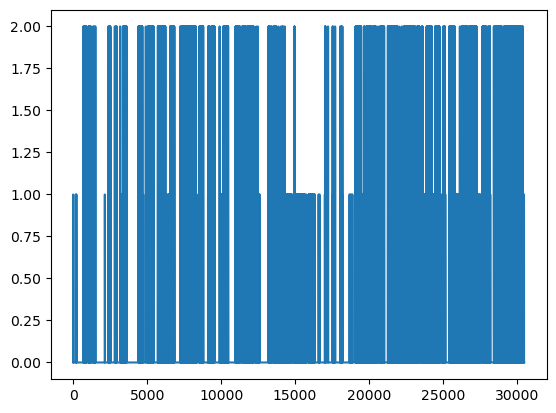

In [51]:
plt.plot(mit_bih.y)

In [ ]:
# So, in the S dataset, there are a lot more 'unhealthy' patients than heal

So, in the Supraventricular dataset, there are a lot more very 'unhealthy' patients than healthy or moderately unhealthy patients. Maybe, for the purposes of my paper, I should leave out patients that don't have arrhythmia episodes in their training/entire dataset?

In [78]:
def get_base_model(in_channels):
    """
    Returns the model from paper: Personalized Monitoring and Advance Warning System for Cardiac Arrhythmias.
    """
    # Input size: 128x1
    # 128x1 -> 122x32 -> 40x32 -> 34x16 -> 11x16 -> 5x16 -> 1x16
    model = nn.Sequential(
        nn.Conv1d(in_channels, 32, kernel_size=7, padding=0, bias=True),
        nn.MaxPool1d(3),
        nn.Tanh(),

        nn.Conv1d(32, 16, kernel_size=7, padding=0, bias=True),
        nn.MaxPool1d(3),
        nn.Tanh(),

        nn.Conv1d(16, 16, kernel_size=7, padding=0, bias=True),
        nn.MaxPool1d(3),
        nn.Tanh(),

        nn.Flatten(),

        nn.Linear(16, 32, bias=True),
        nn.ReLU(),

        nn.Linear(32, 3, bias=True),

    )
    return model

In [80]:
# Combinatorial UCB
import math

class combinatorial_UCB(object):
    def __init__(self,n_clients,algorithm='UCB1_tuned'):
        self.n_clients = n_clients

        # define variables for storage
        # which clients we select
        self.times_selected = np.zeros((n_clients,n_clients)) # to record how often each client got selected
        self.reward_per_client = np.zeros((n_clients,n_clients)) # to record what reward we collected per client
        self.reward2_per_client = np.zeros((n_clients,n_clients)) # to record the squared reward per client (needed for UCB1-tuned)
        # how many clients we select
        self.n_clients_selected_arr = []
        self.reward3_per_client = np.zeros((n_clients,n_clients-1))
        self.times_selected2 = np.zeros((n_clients,n_clients-1))

        self.algorithm = algorithm

    def UCB(self,this_client,n):
        #for this_client in range(self.n_clients):
        other_clients = [x for x in range(self.n_clients) if x != this_client[0]]

        upper_bound = np.zeros(self.n_clients)
        for i,other_client in enumerate(other_clients):
            if self.times_selected[this_client,other_client]==0: # make first iteration value high
                upper_bound[other_client] = 1e500
            else:
                # We first calculate the average reward gained for this client
                average_reward = self.reward_per_client[this_client,other_client] / self.times_selected[this_client,other_client]

                # Then we compute the confidence interval [avg_reward - delta, avg_reward + delta]
                if self.algorithm == 'UCB1':
                    delta = math.sqrt( 2 * math.log(n) / self.times_selected[this_client,other_client])

                if self.algorithm == 'UCB1_tuned':
                    variance_bound = self.reward2_per_client[this_client,other_client] / self.times_selected[this_client,other_client] - average_reward**2
                    variance_bound += math.sqrt(2 * math.log(n)/self.times_selected[this_client,other_client])

                    factor = np.min([variance_bound, 1/4])
                    delta = math.sqrt( factor * math.log(n) / self.times_selected[this_client,other_client] )

                # upper bound
                upper_bound[other_client] = average_reward + delta

        if self.algorithm == 'random':
            upper_bound = np.random.rand(self.n_clients)

        # select the client with the highest upper bound
        sorted_upper_bound = np.flip(np.argsort(upper_bound))

        #n_clients_selected_arr.append(n_clients_selected)
        selected_clients = sorted_upper_bound[:int(n+1)]

        self.times_selected[this_client,selected_clients] += 1
        return selected_clients

    def collect_reward(self,this_client,selected_clients,observations):
        # collect the reward
        reward = observations[selected_clients]#df.iloc[n,selected_client]
        self.reward_per_client[this_client,selected_clients] += reward
        self.reward2_per_client[this_client,selected_clients] += reward**2

        # reward for numbers of clients selected
        n_clients_selected = len(selected_clients)-1
        self.times_selected2[this_client,n_clients_selected] += 1
        reward2 = np.abs(n_clients_selected - np.sum(observations))
        self.reward3_per_client[this_client,n_clients_selected] += 1 - reward2 / self.n_clients


    def to_client(self,this_client,n):
        self.selected_clients = self.UCB(this_client,n)
        return self.selected_clients

    # Combinatorial UCB
import math

class combinatorial_UCB(object):
    def __init__(self,n_clients,algorithm='UCB1_tuned'):
        self.n_clients = n_clients

        # define variables for storage
        # which clients we select
        self.times_selected = np.zeros((n_clients,n_clients)) # to record how often each client got selected
        self.reward_per_client = np.zeros((n_clients,n_clients)) # to record what reward we collected per client
        self.reward2_per_client = np.zeros((n_clients,n_clients)) # to record the squared reward per client (needed for UCB1-tuned)
        # how many clients we select
        self.n_clients_selected_arr = []
        self.reward3_per_client = np.zeros((n_clients,n_clients-1))
        self.times_selected2 = np.zeros((n_clients,n_clients-1))

        self.algorithm = algorithm

    def UCB(self,this_client,n):
        #for this_client in range(self.n_clients):
        other_clients = [x for x in range(self.n_clients) if x != this_client[0]]

        upper_bound = np.zeros(self.n_clients)
        for i,other_client in enumerate(other_clients):
            if self.times_selected[this_client,other_client]==0: # make first iteration value high
                upper_bound[other_client] = 1e500
            else:
                # We first calculate the average reward gained for this client
                average_reward = self.reward_per_client[this_client,other_client] / self.times_selected[this_client,other_client]

                # Then we compute the confidence interval [avg_reward - delta, avg_reward + delta]
                if self.algorithm == 'UCB1':
                    delta = math.sqrt( 2 * math.log(n) / self.times_selected[this_client,other_client])

                if self.algorithm == 'UCB1_tuned':
                    variance_bound = self.reward2_per_client[this_client,other_client] / self.times_selected[this_client,other_client] - average_reward**2
                    variance_bound += math.sqrt(2 * math.log(n)/self.times_selected[this_client,other_client])

                    factor = np.min([variance_bound, 1/4])
                    delta = math.sqrt( factor * math.log(n) / self.times_selected[this_client,other_client] )

                # upper bound
                upper_bound[other_client] = average_reward + delta

        if self.algorithm == 'random':
            upper_bound = np.random.rand(self.n_clients)

        # select the client with the highest upper bound
        sorted_upper_bound = np.flip(np.argsort(upper_bound))

        #n_clients_selected_arr.append(n_clients_selected)
        selected_clients = sorted_upper_bound[:int(n+1)]

        self.times_selected[this_client,selected_clients] += 1
        return selected_clients

    def collect_reward(self,this_client,selected_clients,observations):
        # collect the reward
        reward = observations[selected_clients]#df.iloc[n,selected_client]
        self.reward_per_client[this_client,selected_clients] += reward
        self.reward2_per_client[this_client,selected_clients] += reward**2

        # reward for numbers of clients selected
        n_clients_selected = len(selected_clients)-1
        self.times_selected2[this_client,n_clients_selected] += 1
        reward2 = np.abs(n_clients_selected - np.sum(observations))
        self.reward3_per_client[this_client,n_clients_selected] += 1 - reward2 / self.n_clients


    def to_client(self,this_client,n):
        self.selected_clients = self.UCB(this_client,n)
        return self.selected_clients

    def to_server(self,this_client,observation):
        self.collect_reward(this_client,self.selected_clients,observation)

In [98]:
class P2P_AFPL():

    def __init__(self,patients_left,train_data,test_data,real_test_data,test='local'):
        self.selected_clients = patients_left
        self.network = get_base_model(1)
        self.best_test_loss = {}
        self.best_test_loss_global = 1000000
        self.current_test_loss = {}
        self.current_train_loss = {}
        self.test = test
        self.total_clients = len(self.selected_clients)
        self.patients_left = patients_left
        self.client_models = {}
        self.optimizers = {}
        self.dataloaders = {}
        self.len = {}
        self.len_test = {}
        self.dataloaders_test = {}
        self.dataloaders_really_test = {}
        self.len_really_test = {}
        if self.test == 'AFPL':
            self.client_models_global = {}

        if self.test == 'bandits':
            self.comb_UCB = combinatorial_UCB(self.total_clients)

        for idx,i in enumerate(self.patients_left):
            self.client_models[str(idx)] = copy.deepcopy(self.network).double().cuda()
            self.optimizers[str(idx)] = torch.optim.SGD(self.client_models[str(idx)].parameters(),lr=0.01,momentum=0.5)
            dataset_train=  MIT_BIH([self.patients_left[idx]],train_data)
            self.len[str(idx)] = len(dataset_train)
            self.dataloaders[str(idx)] = DataLoader(dataset_train,batch_size=32,shuffle=True,num_workers=0)


            dataset_test= MIT_BIH([self.patients_left[idx]],test_data)
            self.len_test[str(idx)] = len(dataset_test)
            self.dataloaders_test[str(idx)] = DataLoader(dataset_test,batch_size=32,shuffle=False)
            
            dataset_really_test=  MIT_BIH([self.patients_left[idx]],real_test_data)
            self.len_really_test[str(idx)] = len(dataset_really_test)
            self.dataloaders_really_test[str(idx)] = DataLoader(dataset_really_test,batch_size=32,shuffle=True,num_workers=0)
            
            self.best_test_loss[str(idx)] = 10000000
            self.current_test_loss[str(idx)] = 100000
            self.current_train_loss[str(idx)] = 1000000
            if self.test == 'AFPL':
                self.client_models_global[str(idx)] = copy.deepcopy(self.network).double().cuda()
                self.shared_model = copy.deepcopy(self.network).double().cuda()
        self.dataset_train = dataset_train

    def update_local_models(self,selected_clients):
        self.dw = {}
        loss_test = 0
        loss_test2 = 0
        losses = 0
        losses2 = 0
        loss_test3 = 0
        losses3 = 0

        for idx,i in enumerate(selected_clients):

            dataloader = self.dataloaders[str(i)]
            optimizer= torch.optim.Adam(self.client_models[str(i)].parameters(),lr=0.001*0.95**self.iteration)
            self.client_models[str(i)].train()

            if self.test == 'AFPL':
                self.client_models_global[str(i)] = copy.deepcopy(self.shared_model)
                self.client_models_global[str(i)].train()
                optimizer_global = torch.optim.Adam(self.client_models_global[str(i)].parameters(),lr=0.001*0.95**self.iteration)

            for batch_idx, (data, target) in enumerate(dataloader):
                data   = data.double().unsqueeze(1).cuda()
                target = target.long().cuda()
                output = self.client_models[str(i)](data)
                output = F.log_softmax(output,dim=-1)

                optimizer.zero_grad()
                #output = self.client_models[str(i)](data)
                loss = F.nll_loss(output,target)

                if self.test == 'AFPL':
                    optimizer_global.zero_grad()
                    output_global= self.client_models_global[str(i)](data)
                    loss_global = F.nll_loss(output_global,target)
                    loss_global.backward()
                    optimizer_global.step()

                loss.backward()
                optimizer.step()

            self.client_models[str(i)].eval()
            dataloader_test = self.dataloaders_test[str(i)]
            loss_test = 0
            with torch.no_grad():
                for batch_idx, (data, target) in enumerate(dataloader_test):
                    data   = data.double().unsqueeze(1).cuda()
                    target = target.long().cuda()
                    output = self.client_models[str(i)](data)
                    output = F.log_softmax(output,dim=-1)

                    loss_test += F.nll_loss(output,target)
                self.current_test_loss[str(i)] = loss_test/self.len_test[str(i)]
                if self.current_test_loss[str(i)] < self.best_test_loss[str(i)]:
                    torch.save(self.client_models[str(i)].state_dict(), os.path.join(save_dir, 'model', 'best_model'+str(i)+'.pt'))
                    self.best_test_loss[str(i)] = self.current_test_loss[str(i)]

            losses += loss_test /self.len_test[str(i)]
            loss_test2 = 0
            self.client_models[str(i)].eval()
            with torch.no_grad():
                for batch_idx, (data, target) in enumerate(dataloader):
                    data   = data.double().unsqueeze(1).cuda()
                    target = target.long().cuda()
                    output = self.client_models[str(i)](data)
                    output = F.log_softmax(output,dim=-1)

                    loss_test2 += F.nll_loss(output,target)

                losses2 += loss_test2/ self.len[str(i)]
                self.current_train_loss[str(i)] = loss_test2/self.len[str(i)]

        print('full train loss: ',losses2)
        print('full loss: ',losses)

        return losses2,losses

    def combine_models(self,i,client_numbers,set_as=True):
        zero_copy = copy.deepcopy(self.client_models[str(i)]) # This is used to collect the model in
        j =0
        client_numbers_plus_client = np.concatenate((client_numbers,np.array([int(i)])))# This is more efficient
      #  alphas = zero_copy.alphas.detach()
       # alphas[i] = 1 - torch.sum(
       #     torch.tensor([iii for idx, iii in enumerate(alphas) if idx != i and idx in client_numbers]))
        # It's not possible to set the value of self.alphas[i], so instead we determine it manually here
        alphas = torch.ones(len(client_numbers_plus_client)).cuda()/(len(client_numbers_plus_client))
        #print(alphas)
        for ii in client_numbers_plus_client:
          #  print(ii)
            for (name, param),(name2,param2) in zip(zero_copy.named_parameters(),self.client_models[str(ii)].named_parameters()): #self.client_models[str(ii)].named_parameters()):

                if name != 'alphas':
                    if j == 0:
                        param.data = torch.zeros(param.shape).cuda()

                    param.data += alphas[j]*param2.data # we add all participating client's models to the one here.

            j += 1

        #self.client_models[str(i)] = zero_copy.double()
        if set_as == True:
            for (name,param),(name2,param2) in zip(self.client_models[str(i)].named_parameters(),zero_copy.named_parameters()):
                param.data = param2.data
            self.client_models[str(i)].double()
        else:
            return zero_copy.double()

    def federated_averaging(self):
        self.shared_model = copy.deepcopy(self.network).double().cuda()
        n_clients = len(self.selected_clients)
        weight = [self.len[str(x)] for x in self.selected_clients]
        weight = weight / np.sum(weight)

        losses = 0
        losses2 = 0
        #print("weights ",weight)
        for idx,i in enumerate(self.selected_clients):
            for (name, param),(name2,param2) in zip(self.shared_model.named_parameters()
                                                      ,self.client_models[str(i)].named_parameters()):
                if idx == 0:
                    param.data = torch.zeros(param.shape).cuda().double()
                param.data += weight[idx]*param2.data

        self.shared_model = self.shared_model.double().eval()

        for i in self.selected_clients:
            self.client_models[str(i)] = copy.deepcopy(self.shared_model) #copy global model to the clients
            loss_test = 0
            for batch_idx, (data, target) in enumerate(self.dataloaders_test[str(i)]):
                data   = data.double().unsqueeze(1).cuda()
                target = target.long().cuda()
                output = self.shared_model(data)

                output = F.log_softmax(output,dim=-1)

                loss_test += F.nll_loss(output,target).detach().cpu().numpy()

            loss_test = loss_test/self.len_test[str(i)]
            losses += loss_test
            if loss_test < self.best_test_loss[str(i)]:
                    torch.save(self.client_models[str(i)].state_dict(), os.path.join(save_dir, 'model', 'best_model'+str(i)+'.pt'))
                    self.best_test_loss[str(i)] = loss_test
            self.client_models[str(i)].eval()
            loss_test2 = 0
            for batch_idx, (data,target) in enumerate(self.dataloaders[str(i)]):
                data   = data.double().unsqueeze(1).cuda()
                target = target.long().cuda()
                output = self.shared_model(data)
                output = F.log_softmax(output,dim=-1)

                loss_test2 += F.nll_loss(output,target).detach().cpu().numpy()

            loss_test2 = loss_test2/self.len[str(i)]
            losses2 += loss_test2


        return losses, losses2

    def AFPL(self): #use alpha = 0.25 = 0.75 global model + 0.25 local model
        self.shared_model_old = copy.deepcopy(self.shared_model)
        self.shared_model = copy.deepcopy(self.network).double().cuda()
        n_clients = len(self.selected_clients)
        weight = [self.len[str(x)] for x in self.selected_clients]
        weight = weight / np.sum(weight)

        losses = 0
        losses2 = 0

        #accumulate local weights
        for idx,i in enumerate(self.selected_clients):
            for (name, param),(name2,param2),(name3,param3),(name4,param4) in zip(self.shared_model.named_parameters()
                                                      ,self.client_models_global[str(i)].named_parameters(),
                                                                  self.shared_model_old.named_parameters(),
                                                        self.client_models[str(i)].named_parameters()):
                if idx == 0:
                    param.data = torch.zeros(param.shape).cuda().double()
                param.data += weight[idx]*param2.data # accumulate local weights
                param4.data = 0.25*param4.data + 0.75*param3.data # do AFPL local model update: note that we take the previous global model
            self.client_models[str(i)] = self.client_models[str(i)].double()
            self.client_models[str(i)].eval()
            loss_test = 0
            for batch_idx, (data, target) in enumerate(self.dataloaders_test[str(i)]):
                data   = data.double().unsqueeze(1).cuda()
                target = target.long().cuda()
                output = self.client_models[str(i)](data)
                output = F.log_softmax(output,dim=-1)

                loss_test += F.nll_loss(output,target).detach().cpu().numpy()

            loss_test = loss_test/self.len_test[str(i)]
            losses += loss_test
            if loss_test < self.best_test_loss[str(i)]:
                    torch.save(self.client_models[str(i)].state_dict(), os.path.join(save_dir, 'model', 'best_model'+str(i)+'.pt'))
                    self.best_test_loss[str(i)] = loss_test
            self.client_models[str(i)].eval()
            loss_test2 = 0
            for batch_idx, (data,target) in enumerate(self.dataloaders[str(i)]):
                data   = data.double().unsqueeze(1).cuda()
                target = target.long().cuda()
                output = self.client_models[str(i)](data)
                output = F.log_softmax(output,dim=-1)

                loss_test2 += F.nll_loss(output,target).detach().cpu().numpy()

            loss_test2 = loss_test2/self.len[str(i)]
            losses2 += loss_test2

        self.shared_model = self.shared_model.double()
        return losses, losses2

    def calc_accuracy(self,dataloader,length):
        accuracies = np.zeros(len(self.selected_clients))
        total = 0
        y_pred = []
        y_true = []
        self.accuracy_list = []
        for i in self.selected_clients:
            #dataloader = dataloader
            intermediate_accuracy = 0
            self.client_models[str(i)].eval()
              #y_pred = []
              #y_true = []
            for batch_idx, (data, target) in enumerate(dataloader):
                data = data.unsqueeze(1).double().cuda()
                target = target.long().cuda()
                output = self.client_models[str(i)](data)
                output = F.log_softmax(output,dim=-1)
                output_array = output.detach().cpu().numpy()
                output_class = np.argmax(output_array,axis=-1)
                target_array = target.detach().cpu().numpy()
                intermediate_accuracy += np.sum(output_class == target_array)
                 # y_pred.append(list(output_class))
                 # y_true.append(list(target_array))
                y_true = np.hstack((y_true,[x for x in list(target_array)]))
                y_pred = np.hstack((y_pred,[x for x in list(output_class)]))
                true = [x for x in list(target_array)]
                pred = [x for x in list(output_class)]
                 # preds2 = np.hstack((preds2, [x for x in list(output_class2)]))


            accuracy = intermediate_accuracy/length*100
            self.accuracy_list.append(sklearn.metrics.balanced_accuracy_score(true,pred))
              #print(i)

            total += self.len_test[str(i)]
            accuracies[i] = intermediate_accuracy
        overall_accuracy = np.sum(accuracies)/total*100
     #     print(y_true)
     #     print(y_pred)
        overall_accuracy = sklearn.metrics.balanced_accuracy_score(y_true,y_pred)
        return overall_accuracy

    def bandits(self,client,n):

        selected_clients = []
        other_clients = [x for x in range(self.total_clients) if x != client]
          #print(other_clients)
        ey = np.zeros(self.total_clients)# fix indices
        current_test = np.zeros(self.total_clients)
        collected_clients = []

        selected_clients_UCB = self.comb_UCB.to_client([client],n)
        if client == 14:
            print('selected clients UCB: ',selected_clients_UCB)
        old_accuracy = 0
        for i in selected_clients_UCB:
            shared_model = self.combine_models(client,[i],set_as=False)

            if len(collected_clients)>0:
                all_clients = collected_clients+[i]
                shared_model2 = self.combine_models(client,all_clients,set_as=False)

            shared_model.eval().cuda()
            self.client_models[str(client)].eval().cuda()
            loss_test = 0
            loss_test2 = 0
            loss_test3 = 0
            accuracy_local = 0
            accuracy_shared = 0

            preds1 = []
            targets = []
            preds2 = []

            for batch_idx, (data, target) in enumerate(self.dataloaders_test[str(client)]):
                data = data.unsqueeze(1).double().cuda()
                target = target.long().cuda()
                output = shared_model(data)
                output = F.log_softmax(output,dim=-1)
                output2 = self.client_models[str(client)](data)
                output2 = F.log_softmax(output2,dim=-1)
                loss_test += F.nll_loss(output,target).detach().cpu().numpy()
                loss_test2 += F.nll_loss(output2,target).detach().cpu().numpy()

                if len(collected_clients)>0:
                    output = shared_model2(data)
                    output = F.log_softmax(output,dim=-1)
                    loss_test3 += F.nll_loss(output,target).detach().cpu().numpy()


                output_array = output.detach().cpu().numpy()
                output_class = np.argmax(output_array, axis=-1)
                target_array = target.detach().cpu().numpy()
                accuracy_shared += np.sum(output_class == target_array)

                output_array2 = output2.detach().cpu().numpy()
                output_class2 = np.argmax(output_array2, axis=-1)
                accuracy_local += np.sum(output_class2 == target_array)

                targets = np.hstack((targets,[x for x in list(target_array)]))
                preds1 = np.hstack((preds1,[x for x in list(output_class)]))
                preds2 = np.hstack((preds2, [x for x in list(output_class2)]))


            accuracy_locals = accuracy_local / self.len_test[str(client)] * 100
            accuracy_shareds = accuracy_shared / self.len_test[str(client)] *100
            accuracy_locals = sklearn.metrics.balanced_accuracy_score(targets,preds2)
            accuracy_shareds = sklearn.metrics.balanced_accuracy_score(targets,preds1)
            #  if client == 14:
            #    print('CLIENT: ',i)
            #    print(accuracy_locals)
            #    print(old_accuracy)
            #    print(accuracy_shareds)

              # ACCURACY-based client selection
            if accuracy_shareds > accuracy_locals and accuracy_shareds > old_accuracy:
                collected_clients.append(i)
             #     if client == 14:
             #       print('added i to collected clients')
                old_accuracy = accuracy_shareds
        loss_test = current_test[i]
        #selected_clients = np.where(ey<=self.current_test_loss[str(client)].detach().cpu().numpy() )[0]
        ###selected_clients = [other_clients[x] for x in selected_clients]

        selected_clients = collected_clients

        observation = np.zeros(self.total_clients)
        observation[selected_clients] = 1
        if client == 14:
            print(observation)

        self.comb_UCB.to_server(client,observation)


        if len(selected_clients) > 0 :
            self.combine_models(client,selected_clients,set_as=True)
            loss_test = 0
            for batch_idx, (data, target) in enumerate(self.dataloaders_test[str(client)]):
                data = data.unsqueeze(1).double().cuda()
                target = target.long().cuda()
                output2 = self.client_models[str(client)](data)
                output2 = F.log_softmax(output2,dim=-1)

                loss_test += F.nll_loss(output2,target).detach().cpu().numpy()

            loss_test = loss_test/self.len_test[str(client)]
            if loss_test < self.best_test_loss[str(client)]:
                    torch.save(self.client_models[str(client)].state_dict(), os.path.join(save_dir, 'model', 'best_model'+str(i)+'.pt'))
                    self.best_test_loss[str(client)] = loss_test
            self.client_models[str(client)].eval()
            loss_test2 = 0
            for batch_idx, (data,target) in enumerate(self.dataloaders[str(client)]):
                data = data.unsqueeze(1).double().cuda()
                target = target.long().cuda()
                output2 = self.client_models[str(client)](data)
                output2 = F.log_softmax(output2,dim=-1)

                loss_test2 += F.nll_loss(output2,target).detach().cpu().numpy()

            loss_test2 = loss_test2/self.len[str(client)]
        return loss_test,loss_test2,selected_clients

    def loop(self,epochs,p2p,experiment_name):

        loss_tests = []
        loss_trains = []
        loss_tests2 = []
        loss_trains2 = []
        accuracies = []
        accuracies_train = []
        best_accuracy = 0 
        self.p2p = p2p
        self.phis = np.zeros((self.total_clients, self.total_clients))
        self.selected_clients_arr = np.zeros((epochs,self.total_clients,self.total_clients))

        for i in range(epochs):
            print(i)
            self.iteration = i
            list1 = []
            self.selected_clients = [x for x in range(self.total_clients)]

            loss_train,loss_test = self.update_local_models(self.selected_clients)
            loss_tests.append(loss_test.detach().cpu().numpy())
            loss_trains.append(loss_train.detach().cpu().numpy())

            if self.test == 'AFPL':
                losses2, losses3 = self.AFPL()

            if self.test == 'local':
                print('we are done')

            if self.test == 'federated':
                losses2, losses3 = self.federated_averaging()

            if self.test == 'bandits':
                losses2 = 0
                losses3 = 0
                for client in range(self.total_clients):
                    loss_test2,loss_train2,selected_clients2= self.bandits(client,20)
                    losses2 += loss_test2
                    if len(selected_clients2)< 1:
                        losses3+= self.current_train_loss[str(client)].detach().cpu().numpy()
                    else:
                        losses3 += loss_train2
                    self.phis[client,selected_clients2] += 1
                    self.selected_clients_arr[i,client,selected_clients2] += 1
                fname = os.path.join('/mimer/NOBACKUP/groups/snic2022-22-122/arthur/code/Federated_Averaging/checkpoints_bandits', experiment_name, 'phi'+str(i)+'.txt')
                print(fname)
                np.savetxt(fname,self.phis)
                print('saved?')

            if self.test == 'mine':
                losses2 = 0
                losses3 = 0
                for client in range(self.total_clients):
                    loss_test2,loss_train2,selected_clients2= self.my_method2(client)
                    losses2 += loss_test2
                    if len(selected_clients2)< 1:
                        losses3+= self.current_train_loss[str(client)].detach().cpu().numpy()

                    else:
                        losses3 += loss_train2
                    self.phis[client,selected_clients2] += 1
                    #print(selected_clients2)
                fname = os.path.join('/mimer/NOBACKUP/groups/snic2022-22-122/arthur/code/Federated_Averaging/checkpoints_bandits', experiment_name, 'phi'+str(i)+'.txt')
                np.savetxt(fname,self.phis)

            if self.test == 'optimal':
                losses2, losses3 = self.optimal_fedavg()
                losses2 = losses2.detach().cpu().numpy()
                losses3 = losses3.detach().cpu().numpy()

            if self.test != 'local':
                print('loss after my code: ',losses2)
                print('train loss after my code: ',losses3)
                loss_tests2.append(losses2)
                loss_trains2.append(losses3)
                fname = os.path.join('/mimer/NOBACKUP/groups/snic2022-22-122/arthur/code/Federated_Averaging/checkpoints_bandits', experiment_name, 'losses_test.txt')
                np.savetxt(fname,loss_tests2)
                fname = os.path.join('/mimer/NOBACKUP/groups/snic2022-22-122/arthur/code/Federated_Averaging/checkpoints_bandits', experiment_name, 'losses_train.txt')
                np.savetxt(fname,loss_trains2)


            else:
                fname = os.path.join('/mimer/NOBACKUP/groups/snic2022-22-122/arthur/code/Federated_Averaging/checkpoints_bandits', experiment_name, 'losses_test.txt')
                np.savetxt(fname,loss_tests)
                fname = os.path.join('/mimer/NOBACKUP/groups/snic2022-22-122/arthur/code/Federated_Averaging/checkpoints_bandits', experiment_name, 'losses_train.txt')
                np.savetxt(fname,loss_trains)


            accuracy_val = self.calc_accuracy(self.dataloaders_test[str(i)],self.len_test[str(i)])
            accuracy = self.calc_accuracy(self.dataloaders_really_test[str(i)],self.len_really_test[str(i)])
            print(accuracy)
            accuracies.append(accuracy)
            if accuracy_val > best_accuracy:
                print(best_accuracy)
                print('accuracy is best accuracy')
                print(self.accuracy_list)
                best_accuracy = accuracy_val

                # save all of this in a .txt file
                fname = os.path.join('checkpoints_bandits', experiment_name, 'test_accuracies.txt')
                np.savetxt(fname, self.accuracy_list)
                fname = os.path.join('checkpoints_bandits', experiment_name, 'test_accuracy.txt')
                np.savetxt(fname, [accuracy])
            # accuracy_train = self.calc_accuracy(test=False)
            # print(accuracy_train)
            # accuracies_train.append(accuracy_train)
        # print(self.phis)
            #accuracy_train = self.calc_accuracy(test=False)
            #print(accuracy_train)
            #accuracies_train.append(accuracy_train)
        #print(self.phis)
        fname = os.path.join('/mimer/NOBACKUP/groups/snic2022-22-122/arthur/code/Federated_Averaging/checkpoints_bandits', experiment_name, 'accuracies.txt')
        np.savetxt(fname, accuracies)

        plt.figure()
        plt.plot(loss_trains,label='train loss before')
        plt.plot(loss_tests,label='test loss before')
        plt.plot(loss_trains2,label='train loss after')
        plt.plot(loss_tests2,label='test loss after')
        plt.title('loss curve')
        plt.legend(loc="upper right")
        plt.savefig(os.path.join('/mimer/NOBACKUP/groups/snic2022-22-122/arthur/code/Federated_Averaging/checkpoints_bandits', experiment_name, 'loss_curve.png'))
        plt.clf()
        plt.plot(accuracies,label='test')
       # plt.plot(accuracies_train,label='train')
        plt.title('accuracy progression')
        plt.legend()
        plt.savefig(os.path.join('/mimer/NOBACKUP/groups/snic2022-22-122/arthur/code/Federated_Averaging/checkpoints_bandits', experiment_name, 'accuracy_progression.png'))
        return accuracies

In [99]:
#DATA_ROOT =  "drive/MyDrive/mit-bih-supraventricular-arrhythmia-database-1.0.0"
#os.mkdir("drive/MyDrive/checkpoints_bandits")
import yaml
import os
import shutil
dir = "test3"
def init():

    if not os.path.isdir('/mimer/NOBACKUP/groups/snic2022-22-122/arthur/code/Federated_Averaging/checkpoints_bandits'):
        os.mkdir('/mimer/NOBACKUP/groups/snic2022-22-122/arthur/code/Federated_Averaging/checkpoints_bandits')
    if not os.path.isdir(os.path.join('/mimer/NOBACKUP/groups/snic2022-22-122/arthur/code/Federated_Averaging/checkpoints_bandits', dir)):
        os.mkdir(os.path.join('/mimer/NOBACKUP/groups/snic2022-22-122/arthur/code/Federated_Averaging/checkpoints_bandits',dir))
    save_dir = os.path.join('/mimer/NOBACKUP/groups/snic2022-22-122/arthur/code/Federated_Averaging/checkpoints_bandits', )
    if not os.path.isdir(os.path.join(save_dir, 'model')):
        os.mkdir(os.path.join(save_dir, 'model'))
        print('made dir')
    #shutil.copyfile('settings/train_settings.yaml', save_dir + '/train_settings.yaml')
    return save_dir

save_dir = init()
print(save_dir)

/mimer/NOBACKUP/groups/snic2022-22-122/arthur/code/Federated_Averaging/checkpoints_bandits


In [101]:
print(len(patients_left))

122


0
full train loss:  tensor(0.7604, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.9148, device='cuda:0', dtype=torch.float64)
selected clients UCB:  [21 20  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19  0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
/mimer/NOBACKUP/groups/snic2022-22-122/arthur/code/Federated_Averaging/checkpoints_bandits/test3/phi0.txt
saved?
loss after my code:  0.12254189426645579
train loss after my code:  0.7613602317100479
0.48137626262626265
0
accuracy is best accuracy
[1.0, 1.0, 1.0, 1.0, 0.0, 0.5, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 0.5, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0]


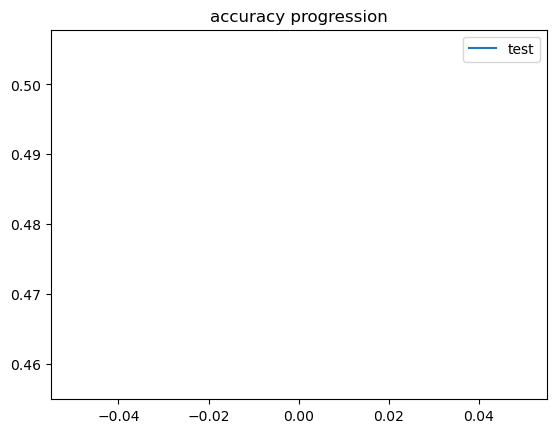

In [100]:
import collections
from time import time
import random
import sklearn
from sklearn.metrics import f1_score, confusion_matrix
import pandas
import torch.nn.functional as F
import warnings
warnings.filterwarnings("ignore")
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)
torch.cuda.manual_seed_all(42)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
experiment_name = dir #settings['experiment_name']
test = 'bandits' #[20:]
n_epochs = 1 #settings['n_epochs']

#p2p = P2P_AFPL(patients_left,data_beats_tr,data_beats_v,data_beats_t,test)
p2p = P2P_AFPL(patients_left[:22],data_beats_tr,data_beats_v,data_beats_t,test)
accuracies_bandits_2 = p2p.loop(n_epochs,p2p,experiment_name)

In [ ]:
print(np.where(p2p.phis>0))

0
full train loss:  tensor(4.1405, device='cuda:0', dtype=torch.float64)
full loss:  tensor(4.8794, device='cuda:0', dtype=torch.float64)
we are done
0.46775104415628865
1
full train loss:  tensor(3.5037, device='cuda:0', dtype=torch.float64)
full loss:  tensor(4.1225, device='cuda:0', dtype=torch.float64)
we are done
0.4046125324063103
2
full train loss:  tensor(2.9144, device='cuda:0', dtype=torch.float64)
full loss:  tensor(3.4214, device='cuda:0', dtype=torch.float64)
we are done
0.4038802520344838
3
full train loss:  tensor(2.4688, device='cuda:0', dtype=torch.float64)
full loss:  tensor(2.8855, device='cuda:0', dtype=torch.float64)
we are done
0.3973932447615507
4
full train loss:  tensor(2.1248, device='cuda:0', dtype=torch.float64)
full loss:  tensor(2.4697, device='cuda:0', dtype=torch.float64)
we are done
0.39638007353561355
5
full train loss:  tensor(1.8557, device='cuda:0', dtype=torch.float64)
full loss:  tensor(2.1541, device='cuda:0', dtype=torch.float64)
we are done
0.4

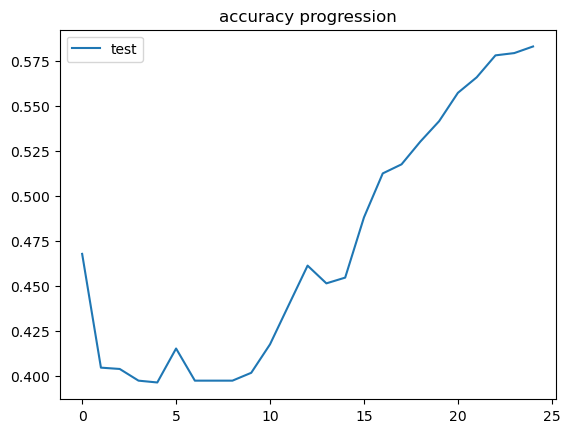

In [85]:
import collections
from time import time
import random
import sklearn
from sklearn.metrics import f1_score, confusion_matrix
import pandas
import torch.nn.functional as F
import warnings
warnings.filterwarnings("ignore")
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)
torch.cuda.manual_seed_all(42)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
experiment_name = 'test' #settings['experiment_name']
test = 'local' #[20:]
n_epochs = 25 #settings['n_epochs']

p2p = P2P_AFPL(patients_left,data_beats_tr,data_beats_v,test)
accuracies_bandits_2 = p2p.loop(n_epochs,p2p,experiment_name)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

#print(phi)
phi_binary =np.array(np.array(p2p.phis,dtype='bool'),dtype='int')
#print(phi_binary)
phi_graph = nx.from_numpy_array(p2p.phis)

def community_layout(g, partition):
    """
    Compute the layout for a modular graph.


    Arguments:
    ----------
    g -- networkx.Graph or networkx.DiGraph instance
        graph to plot

    partition -- dict mapping int node -> int community
        graph partitions


    Returns:
    --------
    pos -- dict mapping int node -> (float x, float y)
        node positions

    """

    pos_communities = _position_communities(g, partition, scale=3.)

    pos_nodes = _position_nodes(g, partition, scale=1.)

    # combine positions
    pos = dict()
    for node in g.nodes():
        pos[node] = pos_communities[node] + pos_nodes[node]

    return pos

def _position_communities(g, partition, **kwargs):

    # create a weighted graph, in which each node corresponds to a community,
    # and each edge weight to the number of edges between communities
    between_community_edges = _find_between_community_edges(g, partition)

    communities = set(partition.values())
    hypergraph = nx.DiGraph()
    hypergraph.add_nodes_from(communities)
    for (ci, cj), edges in between_community_edges.items():
        hypergraph.add_edge(ci, cj, weight=len(edges))

    # find layout for communities
    pos_communities = nx.spring_layout(hypergraph, **kwargs)

    # set node positions to position of community
    pos = dict()
    for node, community in partition.items():
        pos[node] = pos_communities[community]

    return pos

def _find_between_community_edges(g, partition):

    edges = dict()

    for (ni, nj) in g.edges():
        ci = partition[ni]
        cj = partition[nj]

        if ci != cj:
            try:
                edges[(ci, cj)] += [(ni, nj)]
            except KeyError:
                edges[(ci, cj)] = [(ni, nj)]

    return edges

def _position_nodes(g, partition, **kwargs):
    """
    Positions nodes within communities.
    """

    communities = dict()
    for node, community in partition.items():
        try:
            communities[community] += [node]
        except KeyError:
            communities[community] = [node]

    pos = dict()
    for ci, nodes in communities.items():
        subgraph = g.subgraph(nodes)
        pos_subgraph = nx.spring_layout(subgraph, **kwargs)
        pos.update(pos_subgraph)

    return pos

def test(g):
# to install networkx 2.0 compatible version of python-louvain use:
    # pip install -U git+https://github.com/taynaud/python-louvain.git@networkx2
    from community import community_louvain

    #g = nx.karate_club_graph()
    partition = community_louvain.best_partition(g)
    print(partition)
    pos = community_layout(g, partition)

    #nx.draw(g, pos, node_color=list(dict_partition.values())); plt.show()

    nodelist = g.nodes()
    widths = nx.get_edge_attributes(g,'weight')
    cmap = plt.cm.get_cmap('cool')#Spectral
    maxval = 27
    plt.figure(figsize=(7,7))
    nx.draw_networkx_nodes(g,pos,nodelist=nodelist,node_size=100,
                          node_color= [cmap(v/maxval) for v in partition.values()])#list(partition.values()))
    print(list(partition.values()))
    labels = [str(i) for i in range(78)]
    #labels = ['healthy','moderately unhealthy','very unhealthy']
    for v in set(partition.values()):
        plt.scatter([],[],c=[cmap(v/maxval)],label=labels[v])

    nx.draw_networkx_edges(g,pos,edgelist=widths.keys(),width=list(widths.values()),edge_color='k')
    plt.legend()
    plt.show()


    return partition

partition = test(phi_graph)


In [ ]:
print(partition)
values = [x for x in partition.values()]
print(values)
values = np.array(values)
unique_partitions = np.unique(values)
print(np.histogram(values,bins=23)[0])
print(np.argwhere(values==4))
print(np.argwhere(values==7))
print(np.argwhere(values==1))
print(np.argwhere(values==11))
print(np.argwhere(values==12))
print(np.argwhere(values==13))

In [ ]:
#print(p2p.phis[15,:])
print(np.max(p2p.phis))
print(np.where(p2p.phis>=5))
print(p2p.phis[14,64])
print(p2p.phis[64,14])
#print(np.where(p2p.phis>0))
print(np.sum(p2p.phis))

In [ ]:
print(np.where(p2p.phis>=5))

In [ ]:
patients_healthy = []
patients_unhealthy = []
patients_really_unhealthy = []
for i in range(len(patients_left)):

    mit_bih = MIT_BIH([patients_left[i]],data_beats_train)
    #print('train ',torch.sum(mit_bih.y).numpy()/len(mit_bih.y))
    fraction_train = torch.sum(mit_bih.y).numpy()/len(mit_bih.y)
    mit_bih = MIT_BIH([patients_left[i]],data_beats_test)
    #print('test ',torch.sum(mit_bih.y).numpy()/len(mit_bih.y))
    fraction_test = torch.sum(mit_bih.y).numpy()/len(mit_bih.y)
    if fraction_train == 0:
        patients_healthy.append(patients_left[i])
    else:
        print('patient ',i)
        print('N: ',np.count_nonzero(data_beats_train[patients_left[i]]['class']=='N'))
        print('V: ',np.count_nonzero(data_beats_train[patients_left[i]]['class']=='V'))
        V = np.count_nonzero(data_beats_train[patients_left[i]]['class']=='V')
        S = np.count_nonzero(data_beats_train[patients_left[i]]['class']=='S')
        F = np.count_nonzero(data_beats_train[patients_left[i]]['class']=='F')
        print('S: ',np.count_nonzero(data_beats_train[patients_left[i]]['class']=='S'))
        print('F: ',np.count_nonzero(data_beats_train[patients_left[i]]['class']=='F'))
        if V + S + F >= 10:
          patients_really_unhealthy.append(patients_left[i])
        else:
          patients_unhealthy.append(patients_left[i])
print('healthy patients: ',patients_healthy)
print('moderately unhealthy patients: ',patients_unhealthy)
print('very unhealthy patients: ',patients_really_unhealthy)

In [ ]:
patients_healthy = []
for i in range(len(patients_left)):

    print('patient ',i)
    print('N: ',np.count_nonzero(data_beats[patients_left[i]]['class']=='N'))
    print('V: ',np.count_nonzero(data_beats[patients_left[i]]['class']=='V'))
    print('S: ',np.count_nonzero(data_beats[patients_left[i]]['class']=='S'))
    print('F: ',np.count_nonzero(data_beats[patients_left[i]]['class']=='F'))
print('healthy patients: ',patients_healthy)
